# Analyse qualitative bivariée : Exemples des manuels

Version du 5 avril 2024





## Importer les librairies nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

## Références bibliographiques

Référence:

* [Statistique descriptive bidimensionnelle](http://wikistat.fr/pdf/st-l-des-bi.pdf) (Site Wikistat)


Compléments:

* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Bennani: Bennani Dosse Mohammed, _Statistique bivariée avec R_, Rennes, PUR, 2011.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

# Deux variables qualitatives



Documentation:
* Hamon (cit.), Chapitre 4, 99-111.
* Bennani (cit.), Chapitre 2, 23-35.


## Produits et régions de vente

### Tableau de contingence

In [ ]:
d = {'Ouest':[28,14, 45,33,12], 'Sud':[36,21,25,64,23], 
     'Est':[21, 64, 38, 11, 7], 'Nord':[79,42,67,9,41]}
ddf = pd.DataFrame(d)
ddf = ddf.transpose()
ddf.columns= ['P1', 'P2', 'P3', 'P4', 'P5']
ddf

,P1,P2,P3,P4,P5
Ouest,28,14,45,33,12
Sud,36,21,25,64,23
Est,21,64,38,11,7
Nord,79,42,67,9,41


In [ ]:
## Ajouter une ligne
ddf.loc['Total']= ddf.sum()
## Ajouter une colonnne
ddf['Total'] = ddf.sum(axis=1)
ddf

,P1,P2,P3,P4,P5,Total
Ouest,28,14,45,33,12,132
Sud,36,21,25,64,23,169
Est,21,64,38,11,7,141
Nord,79,42,67,9,41,238
Total,164,141,175,117,83,680


In [45]:
### Fréquence conjointe et fréquence marginale (proportion par rapport au total)

ddf_frq = np.round(ddf*100/ddf.iloc[-1,-1],1)
ddf_frq

,P1,P2,P3,P4,P5,Total
Ouest,4.1,2.1,6.6,4.9,1.8,19.4
Sud,5.3,3.1,3.7,9.4,3.4,24.9
Est,3.1,9.4,5.6,1.6,1.0,20.7
Nord,11.6,6.2,9.9,1.3,6.0,35.0
Total,24.1,20.7,25.7,17.2,12.2,100.0


### Pourcentages des lignes

In [47]:
### pourcentages des lignes
stacked_data_lignes = ddf.apply(lambda x: (x*100/sum(x)*2).round(0), axis=1) # axis=0
stacked_data_lignes

,P1,P2,P3,P4,P5,Total
Ouest,21.0,11.0,34.0,25.0,9.0,100.0
Sud,21.0,12.0,15.0,38.0,14.0,100.0
Est,15.0,45.0,27.0,8.0,5.0,100.0
Nord,33.0,18.0,28.0,4.0,17.0,100.0
Total,24.0,21.0,26.0,17.0,12.0,100.0


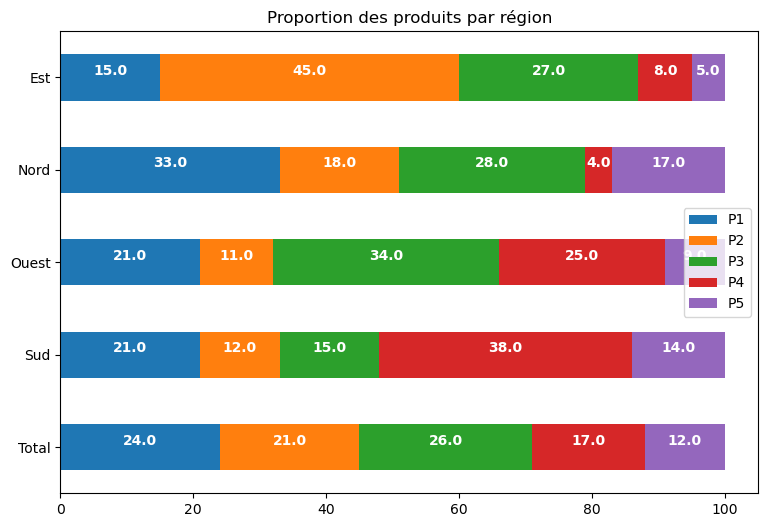

In [98]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

z = stacked_data_lignes.iloc[:, :-1].sort_index(ascending=False).plot(kind="barh", 
                    stacked=True, figsize=(9,6), title='Proportion des produits par région')

### https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
#b = [(p.get_bbox().bounds, p.get_bbox().xmin,p.get_bbox().ymin, p.get_bbox().ymax, p.get_width(), p.get_y(), p.get_height()) for p in z.patches][59]
#print(b)
for p in z.patches:
    b = p.get_bbox()
    y_value=b.y1-b.y0
    z.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

### Pourcentages des colonnes

In [101]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des colonnes (ou des lignes après avoir interverti les variables dans le tableau)
# axis=0 à la place de axis=1
stacked_data_cols = ddf.apply(lambda x: round(x*100/sum(x)*2, 2), axis=0) 
stacked_data_cols

,P1,P2,P3,P4,P5,Total
Ouest,17.07,9.93,25.71,28.21,14.46,19.41
Sud,21.95,14.89,14.29,54.70,27.71,24.85
Est,12.80,45.39,21.71,9.40,8.43,20.74
Nord,48.17,29.79,38.29,7.69,49.40,35.00
Total,100.00,100.00,100.00,100.00,100.00,100.00


In [102]:
### Interchanger les lignes avec les colonnes (=transposer) 
#  afin d'utiliser le même affichage en diagramme à barres
ts_stacked_data_cols = stacked_data_cols.transpose()
ts_stacked_data_cols

,Ouest,Sud,Est,Nord,Total
P1,17.07,21.95,12.80,48.17,100.0
P2,9.93,14.89,45.39,29.79,100.0
P3,25.71,14.29,21.71,38.29,100.0
P4,28.21,54.70,9.40,7.69,100.0
P5,14.46,27.71,8.43,49.40,100.0
Total,19.41,24.85,20.74,35.00,100.0


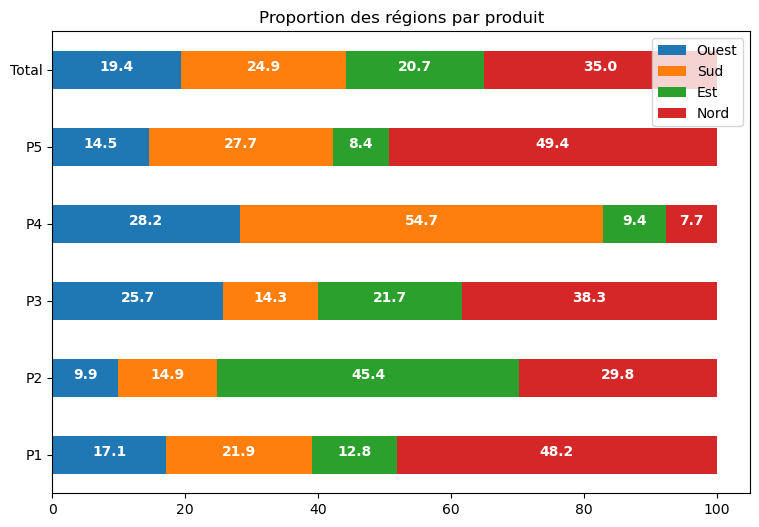

In [106]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

z = ts_stacked_data_cols.iloc[:, :-1].plot(kind="barh", 
                        stacked=True, figsize=(9,6), title='Proportion des régions par produit')

### https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
#b = [(p.get_bbox().bounds, p.get_bbox().xmin,p.get_bbox().ymin, p.get_bbox().ymax, p.get_width(), p.get_y(), p.get_height()) for p in z.patches][59]
#print(b)
for p in z.patches:
    b = p.get_bbox()
    y_value=b.y1-b.y0
    z.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

### Tableau théorique en cas d'indépendance

Produit des marges divisé par le total et arrondi

In [107]:
tx = ddf.loc[:,["Total"]]
ty = ddf.loc[["Total"],:]
### Total général, dernière cellule de la dernière ligne
n = ddf.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Non arrondi
print(indep)

print('\n--------------------------\n')
# Arrondi
print(indep.round(0).astype(int))



               P1          P2          P3          P4         P5  Total
Ouest   31.835294   27.370588   33.970588   22.711765  16.111765  132.0
Sud     40.758824   35.042647   43.492647   29.077941  20.627941  169.0
Est     34.005882   29.236765   36.286765   24.260294  17.210294  141.0
Nord    57.400000   49.350000   61.250000   40.950000  29.050000  238.0
Total  164.000000  141.000000  175.000000  117.000000  83.000000  680.0

--------------------------

        P1   P2   P3   P4  P5  Total
Ouest   32   27   34   23  16    132
Sud     41   35   43   29  21    169
Est     34   29   36   24  17    141
Nord    57   49   61   41  29    238
Total  164  141  175  117  83    680


In [108]:
### Différence en effectifs entre le théorique et l'observé
#  Valeurs arrondies
### Doc. :
#   Bennani, p.30
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (ddf-indep).iloc[:-1,:-1]
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.round(0).astype(int))


       P1  P2  P3  P4  P5
Ouest  -4 -13  11  10  -4
Sud    -5 -14 -18  35   2
Est   -13  35   2 -13 -10
Nord   22  -7   6 -32  12


In [ ]:
### Fonction qui détecte le signe d'une valeur
def sign(val):
    
    if val > 0:
        a = 1
    elif val < 0:
        a = -1
    else:
        a = 0    
    return a


sign(-3)

In [110]:
ecarts_signe = ecarts.applymap(sign)
ecarts_signe

,P1,P2,P3,P4,P5
Ouest,-1,-1,1,1,-1
Sud,-1,-1,-1,1,1
Est,-1,1,1,-1,-1
Nord,1,-1,1,-1,1


In [111]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#   Bennani, p.31
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = round((ddf-indep)**2/indep,2)
ecarts_ponderes.iloc[:-1,:-1]


,P1,P2,P3,P4,P5
Ouest,0.46,6.53,3.58,4.66,1.05
Sud,0.56,5.63,7.86,41.94,0.27
Est,4.97,41.33,0.08,7.25,6.06
Nord,8.13,1.09,0.54,24.93,4.92


In [133]:
ecarts_ponderes_signe = ecarts_ponderes.iloc[:-1,:-1] * ecarts_signe
ecarts_ponderes_signe

,P1,P2,P3,P4,P5
Ouest,-0.46,-6.53,3.58,4.66,-1.05
Sud,-0.56,-5.63,-7.86,41.94,0.27
Est,-4.97,41.33,0.08,-7.25,-6.06
Nord,8.13,-1.09,0.54,-24.93,4.92


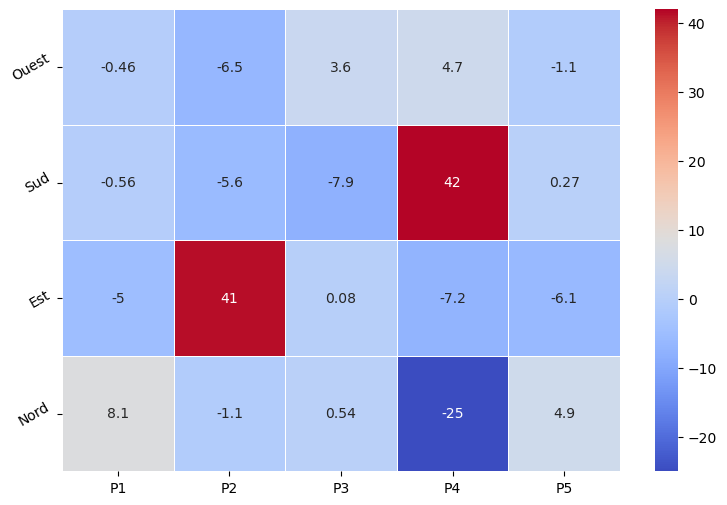

In [120]:
### Écart pondérés
tableau = ecarts_ponderes_signe

fig, ax = plt.subplots(figsize=(9,6))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()

### Calcul du chi carré ou chi2

In [121]:
### Degrés d'indépendance
print('di/dof :', (len(ecarts_ponderes_signe)-1) * (len(ecarts_ponderes_signe.columns)-1), '=', len(ecarts_ponderes_signe)-1, '*', len(ecarts_ponderes_signe.columns)-1)

di/dof : 12 = 3 * 4


In [125]:
### La somme de tout le tableau donne le chi carré ou chi2
colonnes = ecarts_ponderes.sum()
chi_2 = ecarts_ponderes.sum().sum()
print(round(chi_2, 2))

171.84


In [146]:
### Valeurs produites par une fonction
statistic, p, dof, expected = stats.chi2_contingency(ddf.iloc[:-1,:-1])

print(statistic, p, dof)

### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),1)
dfe

171.84495622957783 2.0017466576875573e-30 12


,0,1,2,3,4
0,31.8,27.4,34.0,22.7,16.1
1,40.8,35.0,43.5,29.1,20.6
2,34.0,29.2,36.3,24.3,17.2
3,57.4,49.4,61.2,41.0,29.0


In [148]:
print("({0:.35f})".format(p))

(0.00000000000000000000000000000200175)


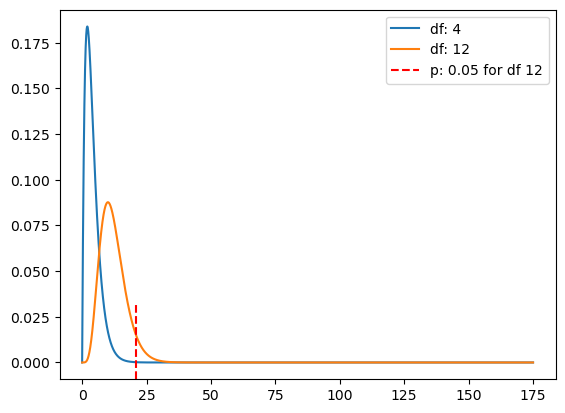

In [127]:
##https://www.statology.org/plot-chi-square-distribution-python/
#x-axis ranges from 0 to 200 with .001 steps
x = np.arange(0, 175, 0.001)

#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, stats.chi2.pdf(x, df=4), label='df: 4')
plt.plot(x, stats.chi2.pdf(x, df=12), label='df: 12')

plt.axvline(x=21.026, ymax=0.2, color='red', linestyle='--', label='p: 0.05 for df 12')

plt.legend()
plt.show()

### Test statistique: rejet de l'hypothèse d'indépendance ?

L'hypothèse H0 est celle de l'indépendace des variables

* valeur critique pour 12 degrés de liberté, à 5 % (= 0.05), Bennani, p.277, tableau D2 = __21.026__
   * cf. https://fr.wikipedia.org/wiki/Loi_du_%CF%87%C2%B2
   *  https://www.statology.org/chi-square-distribution-table/
 
 
* chi-2 mesuré = __171.85__

* P-value: 2.0017466576875573e-30 (cf. https://www.statology.org/chi-square-p-value-calculator/)


Le chi-2 est donc largement supérieur à la valeur critique à 5 % d'erreur, donc H0 (hypothèse d'indépendance) peut être rejetée. Un lien apparaît entre région et produit vendu.

On peut ensuite mesurer la force de ce lien et ses composantes, cf. la suite

In [149]:
### Coéfficient de Cramer
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

## Le résultat montre un certain lien entre les variables, mais pas très fort
# le coééficient V de Cramer se situant entre 0 (absence d'association) et 1 (association parfaite),
# cf. Bennani, 36-37.
vc = stats.contingency.association(ddf.iloc[:-1,:-1], method='cramer')
print(vc)

0.2902373574196642


In [150]:
### Tables des proportions de contributions au chi-2
# cf. Benani, p.35

table = ecarts_ponderes/chi_2
table['Total'] = table.sum(axis=1)
table.loc['Total'] = table.sum(axis=0)
table

,P1,P2,P3,P4,P5,Total
Ouest,0.002677,0.038000,0.020833,0.027118,0.006110,0.094739
Sud,0.003259,0.032763,0.045740,0.244064,0.001571,0.327398
Est,0.028922,0.240514,0.000466,0.042190,0.035265,0.347358
Nord,0.047311,0.006343,0.003142,0.145077,0.028631,0.230505
Total,0.082169,0.317621,0.070182,0.458450,0.071578,1.000000


In [151]:
### % plus lisibles
rt = round(table*100,1)
rt

## On observe que ce sont les régions Sud et Est, ainsi que le produit Nord,
#  qui apportent le plus d'écart par rapport à la situation d'indépendance

,P1,P2,P3,P4,P5,Total
Ouest,0.3,3.8,2.1,2.7,0.6,9.5
Sud,0.3,3.3,4.6,24.4,0.2,32.7
Est,2.9,24.1,0.0,4.2,3.5,34.7
Nord,4.7,0.6,0.3,14.5,2.9,23.1
Total,8.2,31.8,7.0,45.8,7.2,100.0


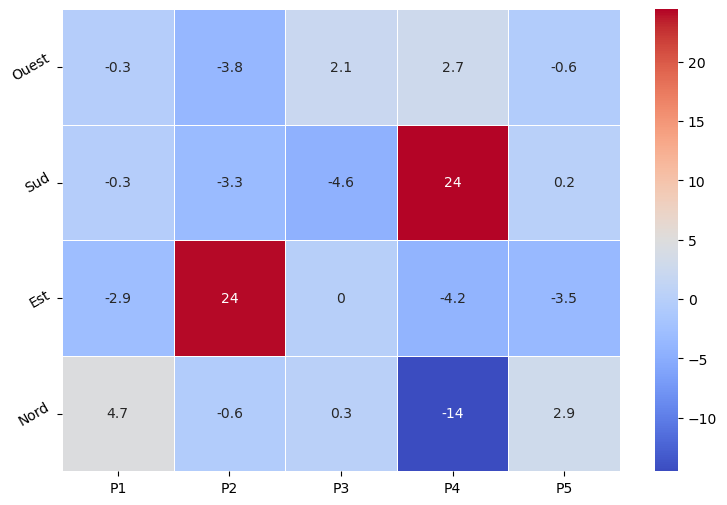

In [152]:
### Écart pondérés avec signes

tableau = rt.iloc[:-1,:-1] * ecarts_signe


fig, ax = plt.subplots(figsize=(9,6))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()